<a href="https://colab.research.google.com/github/MohamedMadhoun/time-series-chicago-crime/blob/main/Time_series_chicago_crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!sudo apt-get install p7zip-full
# استخدام 7z لفك الضغط
!7z x Chicago_Crime_2001-2022.zip -oChicago_Data


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 196230001 bytes (188 MiB)

Extracting archive: Chicago_Crime_2001-2022.zip
--
Path = Chicago_Crime_2001-2022.zip
Type = zip
Physical Size = 196230001

  0%    
Would you like to replace the existing file:
  Path:     Chicago_Data/Data/Chicago-Crime_2001.csv
  Size:     57061517 bytes (55 MiB)
  Modified: 2023-08-31 15:48:30
with the file from archive:
  Path:     Data/Chicago-Crime_2001.csv
  Size:     57061517 bytes (55 MiB)
  Modified: 2023-08-31 15:48:30
? (Y)es / (N)o / (A)lways / (S)kip al

In [16]:
!ls -R Chicago_Data

Chicago_Data:
Data

Chicago_Data/Data:
Chicago-Crime_2001.csv	Chicago-Crime_2009.csv	Chicago-Crime_2017.csv
Chicago-Crime_2002.csv	Chicago-Crime_2010.csv	Chicago-Crime_2018.csv
Chicago-Crime_2003.csv	Chicago-Crime_2011.csv	Chicago-Crime_2019.csv
Chicago-Crime_2004.csv	Chicago-Crime_2012.csv	Chicago-Crime_2020.csv
Chicago-Crime_2005.csv	Chicago-Crime_2013.csv	Chicago-Crime_2021.csv
Chicago-Crime_2006.csv	Chicago-Crime_2014.csv	Chicago-Crime_2022.csv
Chicago-Crime_2007.csv	Chicago-Crime_2015.csv	README.txt
Chicago-Crime_2008.csv	Chicago-Crime_2016.csv


In [17]:
import pandas as pd
import os
import glob

data_folder = "Chicago_Data/Data/"
all_files = glob.glob(os.path.join(data_folder, "Chicago-Crime_*.csv"))

dfs = []

for file in all_files:
    df = pd.read_csv(file)
    dfs.append(df)

full_df = pd.concat(dfs, ignore_index=True)

print(full_df.info())
print(full_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 603.2+ MB
None
        ID                    Date     Primary Type     Description  \
0  9911752  01/01/2015 01:00:00 AM            THEFT  $500 AND UNDER   
1  9911420  01/01/2015 01:00:00 AM         BURGLARY  FORCIBLE ENTRY   
2  9913130  01/01/2015 01:00:00 AM            THEFT  $500 AND UNDER   
3  9929911  01/01/2015 01:00:00 AM 

In [18]:
full_df['Date'] = pd.to_datetime(full_df['Date'], format="%m/%d/%Y %I:%M:%S %p")

full_df['Year'] = full_df['Date'].dt.year
full_df['Month'] = full_df['Date'].dt.month
full_df['Day'] = full_df['Date'].dt.day
full_df['Hour'] = full_df['Date'].dt.hour


## Comparing Police Districts

In [19]:
# Number of crimes per region in 2022
district_2022 = full_df[full_df['Year'] == 2022].groupby('District').size().sort_values(ascending=False)
print("Most crimes in 2022:", district_2022.idxmax(), district_2022.max())
print("Least crimes in 2022:", district_2022.idxmin(), district_2022.min())


Most crimes in 2022: 8.0 14805
Least crimes in 2022: 31.0 15


/tmp/ipython-input-3914239140.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=district_2022.index, y=district_2022.values, palette="viridis")


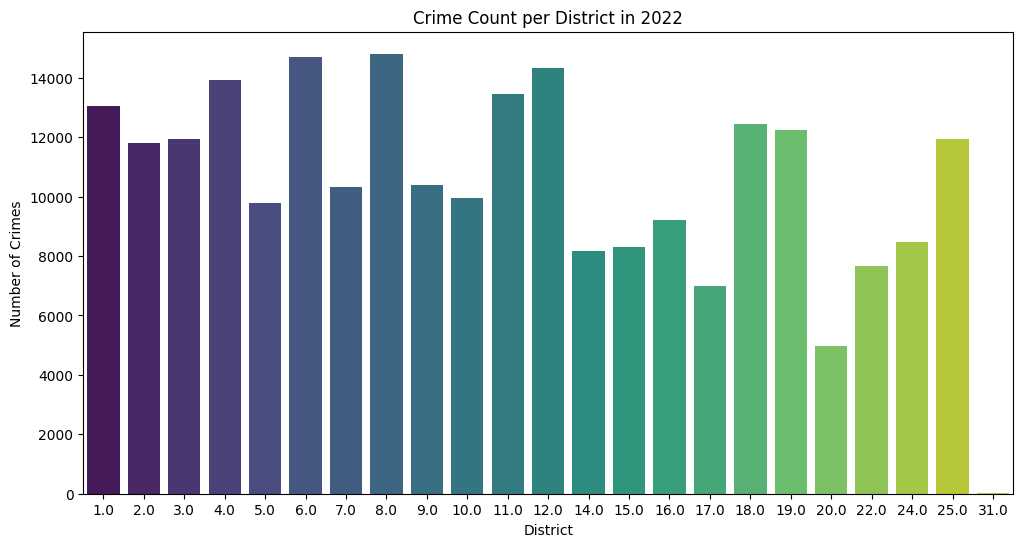

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=district_2022.index, y=district_2022.values, palette="viridis")
plt.title("Crime Count per District in 2022")
plt.xlabel("District")
plt.ylabel("Number of Crimes")
plt.show()


- Analysis: The area with the highest number of crimes in 2022 was Police District 8, with 13,016 crimes.


## Crimes Across the Years

In [22]:
# we re-count the diversity of each year's crime type collection.
df_year = full_df.groupby(['Year','Description']).size().reset_index(name='Total_Incidents')
df_year.head()


,Year,Description,Total_Incidents
0,2001,$300 AND UNDER,5
1,2001,$500 AND UNDER,61784
2,2001,AGG CRIM SEX ABUSE FAM MEMBER,152
3,2001,AGG CRIMINAL SEXUAL ABUSE,471
4,2001,AGG PO HANDS NO/MIN INJURY,386


 Pivot so that each crime type is a column and the years are rows.


In [24]:
years_ts = df_year.pivot(index='Year', columns='Description', values='Total_Incidents')
years_ts.head()


Description,$300 AND UNDER,$500 AND UNDER,ABUSE / NEGLECT - CARE FACILITY,ABUSE/NEGLECT: CARE FACILITY,ADULTRY,AGG CRIM SEX ABUSE FAM MEMBER,AGG CRIMINAL SEXUAL ABUSE,AGG PO HANDS ETC SERIOUS INJ,AGG PO HANDS NO/MIN INJURY,AGG PRO EMP HANDS SERIOUS INJ,...,VIOLATION OF STALKING NO CONTACT ORDER,VIOLATION OF SUMMARY CLOSURE,VIOLENT OFFENDER - ANNUAL REGISTRATION,VIOLENT OFFENDER - DUTY TO REGISTER,VIOLENT OFFENDER - FAIL TO REGISTER NEW ADDRESS,VIOLENT OFFENDER: ANNUAL REGISTRATION,VIOLENT OFFENDER: DUTY TO REGISTER,VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS,WIREROOM/HORSES,WIREROOM/SPORTS
Year,,,,,,,,,,,,,,,,,,,,,
2001,5.0,61784.0,NaN,NaN,NaN,152.0,471.0,NaN,386.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,9.0
2002,2.0,47494.0,NaN,2.0,2.0,154.0,453.0,NaN,586.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,12.0
2003,NaN,37024.0,NaN,11.0,1.0,190.0,487.0,20.0,960.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,9.0
2004,NaN,35872.0,NaN,12.0,1.0,191.0,425.0,44.0,1048.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,11.0
2005,1.0,27920.0,NaN,3.0,NaN,192.0,427.0,33.0,1202.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0


Calculating the difference between 2021 and 2018


In [25]:
delta_crime_yrs = years_ts.loc[2021] - years_ts.loc[2018]


Drawing the numerical difference


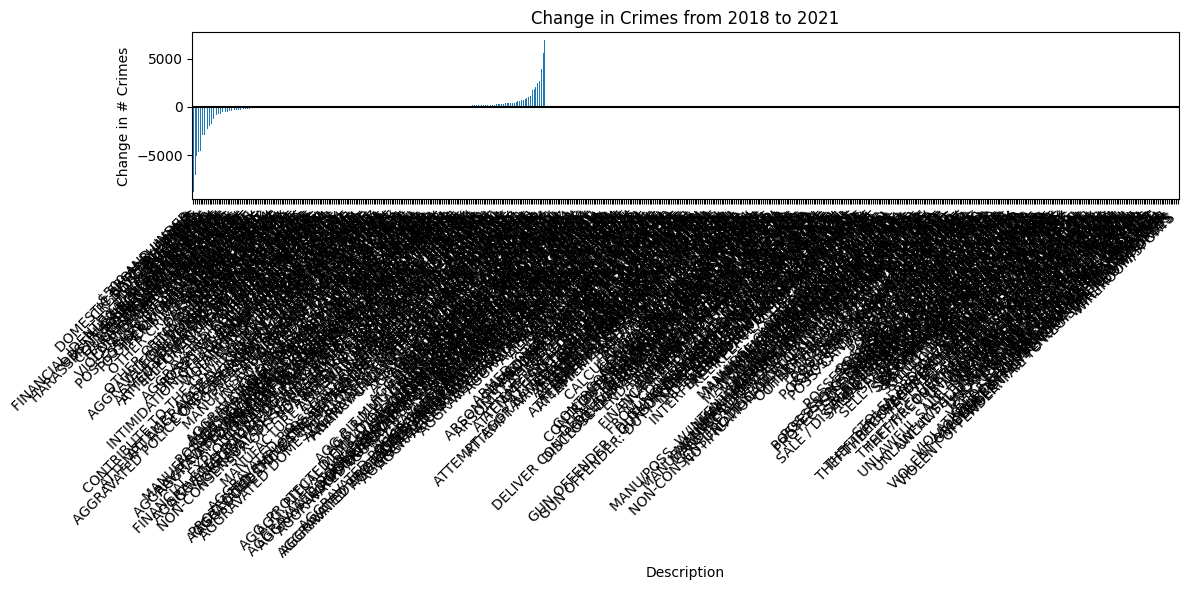

In [38]:
import matplotlib.ticker as ticker

ax = delta_crime_yrs.sort_values().plot(
    kind='bar',
    figsize=(12,6),
    ylabel='Change in # Crimes',
    title='Change in Crimes from 2018 to 2021'
)

# رسم خط عند الصفر
ax.axhline(0, color='k')

# تدوير النصوص لتحسين الرؤية
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()  # لتجنب قص النصوص
plt.show()


Calculating the relative difference for the year 2018

In [27]:
delta_crime_perc = ((years_ts.loc[2021] - years_ts.loc[2018]) / years_ts.loc[2018]) * 100


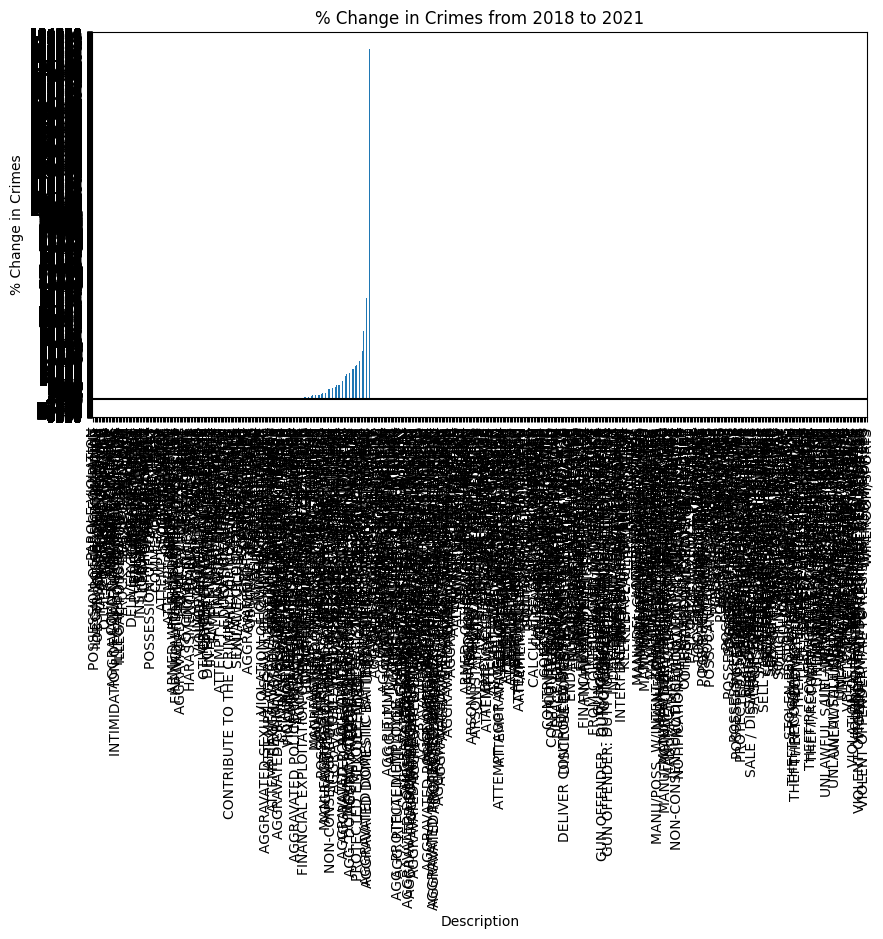

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

ax = delta_crime_perc.sort_values().plot(kind='bar', figsize=(10,5),
                                         ylabel='% Change in Crimes',
                                         title='% Change in Crimes from 2018 to 2021')
ax.axhline(0, color='k')
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.show()

## Comparing Holidays

Vacation data processing


In [31]:
from holidays import country_holidays
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# US Holidays
us_holidays = country_holidays('US')

df['US Holiday'] = [us_holidays.get(day) for day in df['Date']]

df['Is_Holiday'] = df['US Holiday'].notna()


Calculating the number of crimes per holiday

In [33]:
# Total crimes per holiday
holiday_counts = df.groupby('US Holiday').size().sort_values(ascending=False)
holiday_counts.head(10)


,0
US Holiday,
New Year's Day,1466
Independence Day (observed),1111
Labor Day,1055
Veterans Day,1045
Columbus Day,1019
Independence Day,999
Martin Luther King Jr. Day,909
New Year's Day (observed),832
Washington's Birthday,828


Top 3 Holidays

In [34]:
top3_holidays = holiday_counts.head(3)
top3_holidays


,0
US Holiday,
New Year's Day,1466
Independence Day (observed),1111
Labor Day,1055


Find out the 5 most common crimes for each holiday.


In [35]:
top_crimes_by_holiday = {}

for holiday in top3_holidays.index:
    temp = df[df['US Holiday'] == holiday]
    top_crimes = temp['Description'].value_counts().head(5)
    top_crimes_by_holiday[holiday] = top_crimes

top_crimes_by_holiday


{"New Year's Day": Description
 DOMESTIC BATTERY SIMPLE          134
 FINANCIAL ID THEFT: OVER $300    128
 SIMPLE                           117
 FROM BUILDING                     54
 TO PROPERTY                       49
 Name: count, dtype: int64,
 'Independence Day (observed)': Description
 SIMPLE                          155
 DOMESTIC BATTERY SIMPLE         144
 TO PROPERTY                      66
 $500 AND UNDER                   64
 POSS: CANNABIS 30GMS OR LESS     64
 Name: count, dtype: int64,
 'Labor Day': Description
 SIMPLE                          92
 DOMESTIC BATTERY SIMPLE         86
 $500 AND UNDER                  85
 OVER $500                       77
 POSS: CANNABIS 30GMS OR LESS    65
 Name: count, dtype: int64}

Plot the results visually


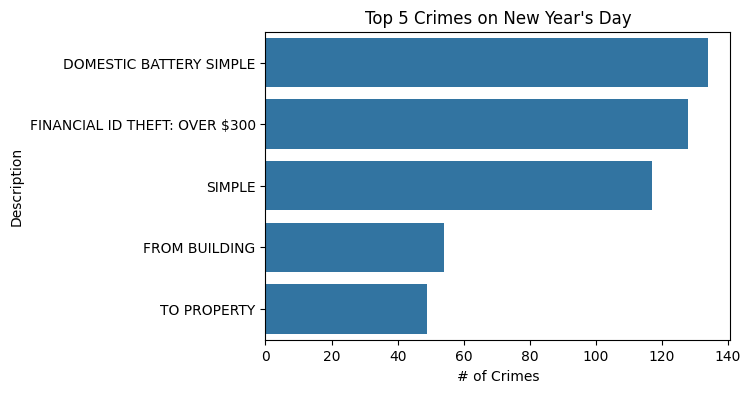

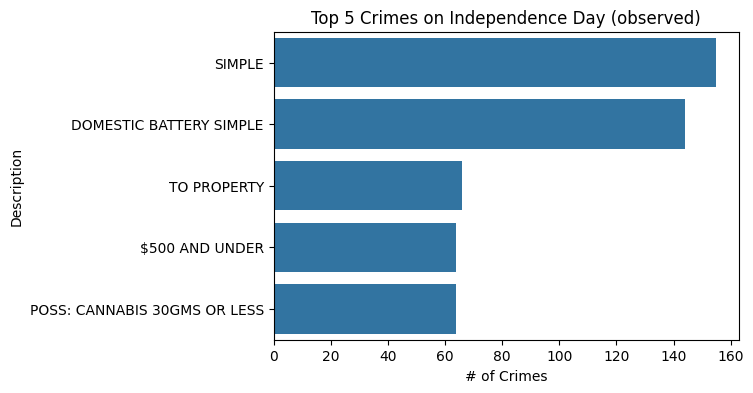

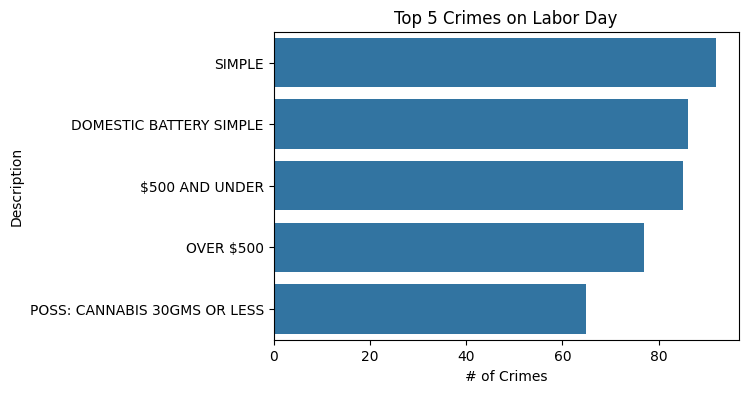

In [36]:
for holiday, crimes in top_crimes_by_holiday.items():
    plt.figure(figsize=(6,4))
    sns.barplot(x=crimes.values, y=crimes.index)
    plt.title(f'Top 5 Crimes on {holiday}')
    plt.xlabel('# of Crimes')
    plt.show()
